In [1]:
dataset_names = {0:'usps',\
                 1:'satimage.scale',\
                 2:'dna.scale',\
                 3:'letter.scale',\
                 4:'pendigits',\
                 5:'news20.scale',\
                 6:'sector.scale',\
                 7:'mnist.scale',\
                 8:'cifar10',\
                 9:'toy',\
                 10:'rcv1',\
                 11:'aloi.scale'\
                }

regs = {'usps':.1,\
        'satimage.scale':1,\
        'dna.scale':1,\
        'letter.scale':.1,\
        'pendigits':.01,\
        'news20.scale':.1,\
        'sector.scale':1,\
        'mnist.scale':.01,\
        'cifar10':1,\
        'toy':1,\
        'rcv1':1,\
        'aloi.scale':.01\
       }


iters = {'usps':2048,\
         'satimage.scale':64,\
         'dna.scale':512,\
         'letter.scale':64,\
         'pendigits':8192,\
         'news20.scale':32,\
         'sector.scale':32,\
         'mnist.scale':64,\
         'cifar10':32,\
         'toy':32,\
         'rcv1':32,\
         'aloi.scale':32\
       }
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import math

In [2]:
ds = dataset_names[11]
ds

'aloi.scale'

In [3]:
def run_experiment(dataset_name, regularizer, num_iterations, variant):
    if variant == "WW":
        FILENAME = 'results/' + dataset_name + '_RC'
        COMMAND = './train -s 30 -c ' + str(regularizer) + ' -t ' + str(num_iterations) + ' data/' + dataset_name + ' >> '+ FILENAME
    elif variant == "Shark":
        FILENAME = 'results/' + dataset_name + '_Shark'
        COMMAND = './train -s 31 -c ' + str(regularizer) + ' -t ' + str(num_iterations) + ' data/' + dataset_name + ' >> '+ FILENAME
    else:
        print("Invalid variant")
        return
    os.system('rm ' + FILENAME)
    os.system(COMMAND)

In [4]:
run_experiment(ds, regs[ds], iters[ds], "WW")

In [5]:
run_experiment(ds, regs[ds], iters[ds], "Shark")

In [6]:
def get_results(FILENAME):
    f = open(FILENAME, "r")
    lines = f.readlines()
    extract_nums = lambda x: re.findall(r'\d*\.?\d*',x)
    process_data = lambda line: map(float,filter(lambda x: len(x) > 0 , extract_nums(line)))

    result_np = np.array(map(process_data, lines))
    result_np[:,0] = result_np[:,0]/1000
    new_col =result_np[:,1] - result_np[:,2]
    new_col = new_col.reshape(len(new_col),1)
    new_col.shape

    result_np = np.append(result_np, new_col, 1)
    return result_np

In [7]:
result_RC = get_results("results/"+ds+'_RC')
result_Shark = get_results("results/"+ds+'_Shark')

In [8]:
colnames = ['time (sec)', 'sum of dual vars', 'norm/2', 'C*hinge risk', 'primal obj', 'dual obj']
cn = {colnames[i] : i for i in xrange(len(colnames))}

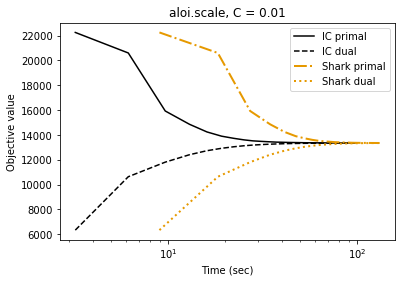

In [9]:

fig, ax = plt.subplots()
ax.semilogx(result_RC[:,cn['time (sec)']],\
            result_RC[:,cn['primal obj']],\
            linestyle='-', \
            color='k')
ax.semilogx(result_RC[:,cn['time (sec)']], \
            result_RC[:,cn['dual obj']], \
            linestyle='--', \
            color='k')

orange = (0.9,0.6,0)
ax.semilogx(result_Shark[:,cn['time (sec)']], \
            result_Shark[:,cn['primal obj']], \
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)
ax.semilogx(result_Shark[:,cn['time (sec)']],\
            result_Shark[:,cn['dual obj']],\
            linestyle = ':', \
            color = orange,\
            linewidth = 2)

plt.xlabel("Time (sec)")
plt.ylabel("Objective value")
plt.title(ds + ', C = ' + str(regs[ds]))
ax.legend(['IC primal','IC dual','Shark primal','Shark dual'])
plt.savefig('figures/' + ds + '_' + str(int(math.log10(regs[ds])))+'_ob.eps',format='eps')

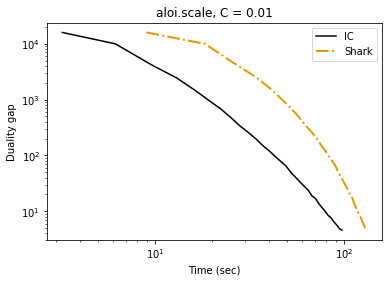

In [10]:


fig, ax = plt.subplots()
ax.loglog(result_RC[:,cn['time (sec)']],\
            result_RC[:,cn['primal obj']]-result_RC[:,cn['dual obj']] ,\
            linestyle='-', \
            color='k')

orange = (0.9,0.6,0)
ax.loglog(result_Shark[:,cn['time (sec)']], \
            result_Shark[:,cn['primal obj']]-result_Shark[:,cn['dual obj']], \
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)

plt.xlabel("Time (sec)")
plt.ylabel("Duality gap")
plt.title(ds + ', C = ' +str(regs[ds]))
ax.legend(['IC','Shark'])
plt.savefig('figures/'+ds+'_'+ str(int(math.log10(regs[ds])))+'_dg.eps',format='eps')